<a href="https://colab.research.google.com/github/RaulFloresR/Mineria_de_Datos/blob/main/tecnicas_de_mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Equipo 6; Grupo 02; Frecuencia: Miercoles 7:00pm-10:00pm**

1869524 Luis Said Martinez Hernandez

1687417 Francisco Javier Gonzales Olivares

1838148 Raul Flores Robles

1817336 Edmundo Isai Ibarra Cavazos


Para el quipo 6 se llego a la conclusión de utilizar la tecnica de reglas de asociación de acuerdo a nuestros objetivos planteados, para lo cual se utilizó como base el notebook de "Association Rules with Python" de la pagina de kaggle 

Url;  https://www.kaggle.com/mervetorkan/association-rules-with-python/notebook



1-Busqueda de Tecnica para aplicar en el proyecto 

Association Rules

Association Rules Analysis has become familiar for analysis in the retail industry. It is also called Market Basket Analysis terms. This analysis is also used for advice. Personal recommendations in applications such as Spotify, Netflix, and Youtube can be given as examples. One of the biggest examples of Association Rules Analysis is the correlation between beer and diaper. When Walmart, a chain store in the United States, studied the shopping behavior of customers, the study showed that diapers and beers are bought together. Because, as it turns out, fathers are often tasked with shopping while mothers stay with the baby.

Apriori Algorithm

The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts. These algorithm properties and data are evaluated with Boolean Association Rules. In this algorithm, there are product clusters that pass frequently, and then strong relationships between these products and other products are sought.

The importance of an Association Rules can be determined by 3 parameters that are used to identify the strength of the algorithm. Namely,

Support


Confidence

Lift


Let X and Y represent the products in the market and N represents the total number of products.

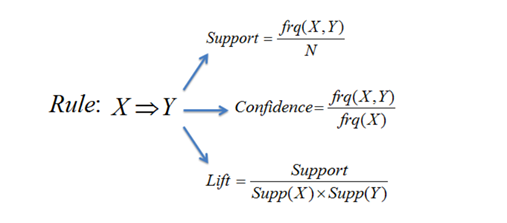

Support : It is the probability of an event to occur.

Confidence : It is a measure of conditional probability

Lift : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

Import the Libraries and Dataset

The first step, as always, is to import the required libraries.
In the script below I import pandas, numpy, and apriori libraries.

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from google.colab import files
files.upload()

Saving GroceryStoreDataSet.csv to GroceryStoreDataSet.csv


{'GroceryStoreDataSet.csv': b'"MILK,BREAD,BISCUIT"\n"BREAD,MILK,BISCUIT,CORNFLAKES"\n"BREAD,TEA,BOURNVITA"\n"JAM,MAGGI,BREAD,MILK"\n"MAGGI,TEA,BISCUIT"\n"BREAD,TEA,BOURNVITA"\n"MAGGI,TEA,CORNFLAKES"\n"MAGGI,BREAD,TEA,BISCUIT"\n"JAM,MAGGI,BREAD,TEA"\n"BREAD,MILK"\n"COFFEE,COCK,BISCUIT,CORNFLAKES"\n"COFFEE,COCK,BISCUIT,CORNFLAKES"\n"COFFEE,SUGER,BOURNVITA"\n"BREAD,COFFEE,COCK"\n"BREAD,SUGER,BISCUIT"\n"COFFEE,SUGER,CORNFLAKES"\n"BREAD,SUGER,BOURNVITA"\n"BREAD,COFFEE,SUGER"\n"BREAD,COFFEE,SUGER"\n"TEA,MILK,COFFEE,CORNFLAKES"\n'}

Let's examine the shape of the data set,

In [ ]:
df=pd.read_csv("GroceryStoreDataSet.csv",names = ['products'], sep = ',')
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [ ]:
df.shape

(20, 1)

In [ ]:
data = list(df["products"].apply(lambda x:x.split(",") ))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

Apriori Algorithm and One-Hot Encoding

Apriori's algorithm transforms True/False or 1/0.

Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list.

Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Applying Apriori and Resulting

The next step is to create the Apriori Model. We can change all the parameters in the Apriori Model in the mlxtend package.
I will try to use minimum support parameters for this modeling.
For this, I set a min_support value with a threshold value of 20% and printed them on the screen as well.

In [ ]:
#set a threshold value for the support value and calculate the support value.
df = apriori(df, min_support = 0.2, use_colnames = True)
df

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


I chose the 60% minimum confidence value. In other words, when product X is purchased, we can say that the purchase of product Y is 60% or more.

In [ ]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


For example, if we examine our 1st index value;

The probability of seeing sugar sales is seen as 30%.
Bread intake is seen as 65%.
We can say that the support of both of them is measured as 20%.
67% of those who buys sugar, buys bread as well.
Users who buy sugar will likely consume 3% more bread than users who don't buy sugar.
Their correlation with each other is seen as 1.05.
As a result, if item X and Y are bought together more frequently, then several steps can be taken to increase the profit. For instance:

Cross-Selling can be improved by combining products - items
The shop layout can be changed so that sales can be improved when certain items are kept together.
Promotional activities which are an advertising campaign can be carried out to increase the sales of goods that customers do not buy.
Collective discounts can be offered on these products if the customer buys both of them.

2-Modificación del codigo

In [6]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import files
files.upload()

Saving mat-nb.csv to mat-nb.csv


{'mat-nb.csv': b'sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3\r\n1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0\r\n1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0\r\n1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0\r\n1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1\r\n1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0\r\n0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1\r\n0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0\r\n1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1\r\n0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1\r\n1,1,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0\r\n1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0\r\n0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1\r\n0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0\r\n0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1\r\n1,1,1,1,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1\r

In [22]:
df=pd.read_csv("mat-nb.csv")
df.head()

,sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1
4,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0


Cargamos la tabla y para poder tener un mejor codigo cambiamos los datos de "si" por 1 y "no" por 0. En la columa de sexo 1 representan mujeres y 0 representan hombres. En cuanto a los valores de frecuencia del 1-5 el "0" representa del 1-3, el "1" representa 4-5 a expecion de la columna de salud los cuales son representados por "0" los valores que eran 1-2 y los mayores son representatos por "1".


In [23]:
df = apriori(df, min_support = 0.5, use_colnames = True)
df

,support,itemsets
0,0.526582,(sex)
1,0.896203,(Pstatus)
2,0.612658,(famsup)
3,0.508861,(activities)
4,0.794937,(nursery)
5,0.949367,(higher)
6,0.832911,(internet)
7,0.762025,(famrel)
8,0.767089,(health)
9,0.516456,"(sex, higher)"


Establecimos un valor umbral para el valor de soporte y calculamos el valor de soporte. Nuestro soporte minimo es de 50%.

In [24]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.85
                          
                          )
df_ar


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sex),(higher),0.526582,0.949367,0.516456,0.980769,1.033077,0.016536,2.632911
1,(famsup),(Pstatus),0.612658,0.896203,0.551899,0.900826,1.005159,0.002833,1.046624
2,(nursery),(Pstatus),0.794937,0.896203,0.701266,0.882166,0.984337,-0.011158,0.880876
3,(Pstatus),(higher),0.896203,0.949367,0.848101,0.946328,0.996798,-0.002724,0.943371
4,(higher),(Pstatus),0.949367,0.896203,0.848101,0.893333,0.996798,-0.002724,0.973101
5,(internet),(Pstatus),0.832911,0.896203,0.754430,0.905775,1.010681,0.007973,1.101592
6,(famrel),(Pstatus),0.762025,0.896203,0.686076,0.900332,1.004608,0.003147,1.041435
7,(health),(Pstatus),0.767089,0.896203,0.691139,0.900990,1.005342,0.003672,1.048354
8,(famsup),(higher),0.612658,0.949367,0.592405,0.966942,1.018512,0.010768,1.531646
9,(famsup),(internet),0.612658,0.832911,0.529114,0.863636,1.036889,0.018824,1.225316


Usamos la regla de asociación con la métrica de confidence y un umbral minimo de 85%, el cual nos dice que los antecedentes suceden y la columna consequentes tiene un 85% de probabilidad de pasar. Utilizamos valores altos para reducir la cantidad de valores a analizar.

# Conclusión:
La técnica de reglas de asociación demostró ser util para encontrar la relación entre diversas columnas de nuestra base de datos, ya que con ésta podemos describir la relación que existe entre los factores externos que pueden contribuir en el consumo del alcohol en los estudiantes, asi como en su calidad de vida. 
Las métricas que tomamos terminaron siendo valores arbitrarios que nos sirvieron para tener un numero mas reducido de valores a analizar, por lo que podemos hacer un analisis menos estricto para encontrar mas información de utilidad. Además, podemos modificar los datos en el futuro, como por ejemplo cambiar los valores binarios que se le asignó al sexo, para que los resultados nos reflejen la cantidad de hombres.